# Descripción del proyecto
Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigar: 

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

## Paso 1. Acceda los datos y prepáralos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. Rutas de archivos:

- /datasets/visits_log_us.csv (registros del servidor con datos sobre las visitas al sitio web)
- /datasets/orders_log_us.csv (datos sobre pedidos)
- /datasets/costs_us.csv (datos sobre gastos de marketing)


In [131]:
# Importamos las librerias que podamos ocupar y las bases de datos.

import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

visits = pd.read_csv('archives/visits_log_us.csv')
orders = pd.read_csv('archives/orders_log_us.csv')
costs_mkt = pd.read_csv('archives/costs_us.csv')

Vamos a explorar el archivo vosots_log_us y revisar sus tipos de datos para el DF visit.

In [132]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


- No tenemos valores faltantes, repetidos muy probablemte si pero esos los quitamos especificamente en los análisis posteriores,
- convertimos los nombres de las columnas a snake_case en minúsculas y
- cambiamos el Dtype de las fechas a .datetime ya que las necesitaremos para los análisis más adelante.

In [133]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [134]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format= "%Y-%m-%d %H:%M:%S")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format= "%Y-%m-%d %H:%M:%S")

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Ahora vamos a explorar y analizar el archivo order_log_us del DF orders

In [135]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


- No tenemos valores faltantes, repetidos muy probablemte si pero esos los quitamos especificamente en los análisis posteriores,
- convertimos los nombres de las columnas a snake_case en minúsculas y
- cambiamos el Dtype de las fechas a .datetime ya que las necesitaremos para los análisis más adelante.

In [136]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [137]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Por ultimo, analizaremos el archivo costs_us.csv del DF costs_mkt.

In [138]:
costs_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


- No tenemos valores faltantes, repetidos muy probablemte si pero esos los quitamos especificamente en los análisis posteriores, solo
- cambiamos el Dtype de las fechas a .datetime ya que las necesitaremos para los análisis más adelante.

In [139]:
costs_mkt['dt'] = pd.to_datetime(costs_mkt['dt'])

costs_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Paso 2. Haz informes y calcula métricas 

### 1. Visitas:
- 1.1 ¿Cuántas personas lo usan cada día, semana y mes?
- 1.2 ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- 1.3 ¿Cuál es la duración de cada sesión?
- 1.4 ¿Con qué frecuencia los usuarios regresan?

Vamos empezar imprimiendo las primeras 5 filas de la tabla para generar una noción con lo que estamos trabajando.

In [140]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Crearemos columnas separadas para los valores de año, mes, semana y fecha que utilizaremos para hacer el análisis de las preguntas siguientes

In [141]:
# Separación de tipo de datos, para año y semana es necesario utilizar isocalendar().
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


### 1.1 ¿Cuántas personas lo usan cada día, semana y mes?

Utilizaremos las métricas de DAU, WAU y MAU para saber cuántos usuarios lo usan. 

In [142]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean().astype('int64')
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean().astype('int64')
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean().astype('int64')

print(f"El DAU total es: {dau}")
print(f"El WAU total es: {wau}")
print(f"El MAU total es: {mau}")

El DAU total es: uid    907
dtype: int64
El WAU total es: uid    5716
dtype: int64
El MAU total es: uid    23228
dtype: int64


### Conclusión:
- 907 personas en promedio visitan la página por día,
- 5,716 personas en promedio visitan la página por semana y
- 23,228 personas en promedio por mes. 

### 1.2 ¿Cuántas sesiones hay por día?

In [143]:
sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'}).mean().astype('int64')
session_every_day = visits.groupby('session_date').agg({'uid': 'count'}).astype('int64')

print(f"Sesiones por día: {sessions_per_day}")
print(session_every_day)

Sesiones por día: uid    987
dtype: int64
               uid
session_date      
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
...            ...
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256

[364 rows x 1 columns]


### Conclusión:
Hay en promedio unas 987 sesiones por día, hay que considerar que los usuarios pueden realizar más de una sesión diaria.

### 1.3 ¿Cuál es la duración de cada sesión?

Aplicaremos una resta de la columna del tiempo que termina la sessión ('end_ts') menos el tiempo que inicia la sesión ('start_ts') y lo mostraremos en segundos junto a un histograma.

0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration, Length: 359400, dtype: int32
Axes(0.125,0.11;0.775x0.77)


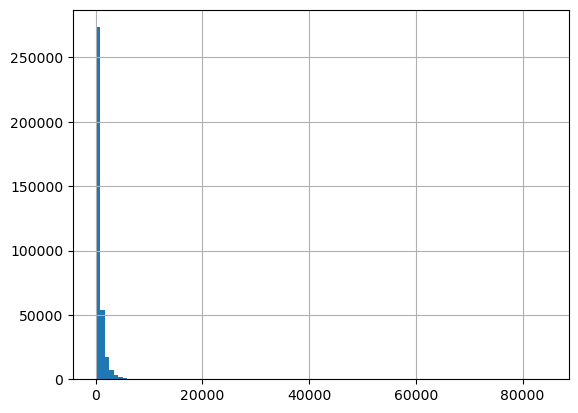

In [144]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

print(visits['session_duration'])
print(visits['session_duration'].hist(bins=100))

Con la métrica ASL podemos obtener la duración media de las sesiones.

In [145]:
asl = visits['session_duration'].mode()

print(asl)

0    60
Name: session_duration, dtype: int32


### Conclusión:
Las duraciones de las sesiones no se distribuyen de manera uniforme, por eso debemos utilizar la métrica ASL para conocer la duración media por sesión que es de 60 segundos.

### 1.4 ¿Con qué frecuencia los usuarios regresan?

Utilizaremos el sticky factor para calcular la frecuencia de retorno de los usuarios.

In [146]:
# sticky factor mensual 
sticky_factor_month = (dau / mau) * 100
# sticky factor semanal 
sticky_factor_week = (dau / wau) * 100

print(f"El sticky factor mensual es de: {sticky_factor_month}")
print(f"El sticky factor semanal es de: {sticky_factor_week}")

El sticky factor mensual es de: uid    3.90477
dtype: float64
El sticky factor semanal es de: uid    15.86774
dtype: float64


### Conclusión:
- La frecuencia con la que regresan los usuarios semanalmente es del 15.8 porciento, y 
- la frecuencia con que regresan mensualmente es del 3.9 porciento.

### 2. Ventas
- 2.1 ¿Cuándo empieza la gente a comprar?
- 2.2 ¿Cuántos pedidos hacen durante un periodo de tiempo dado?
- 2.3 ¿Cuál es el tamaño promedio de compra?
- 2.4 ¿Cuánto dinero traen?

Vamos a visualizar las primeras 5 filas.

In [147]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Armamos los cohortes que serán de cada mes

In [148]:
# Calculamos la primera compra de cada cliente
first_purchase = orders.groupby('uid')['buy_ts'].min()

# Cambiamos el nombre del objeto Series 'buy_ts' resultante para poder unirlo con el DF orders y no haya nombres repetidos 
first_purchase.name = 'first_purchase_date'

print(first_purchase.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_purchase_date, dtype: datetime64[ns]


In [149]:
# Juntamos el DF con la Serie obtenida
orders = orders.join(first_purchase, on= 'uid')

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   buy_ts               50415 non-null  datetime64[ns]
 1   revenue              50415 non-null  float64       
 2   uid                  50415 non-null  uint64        
 3   first_purchase_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB
None


In [150]:
# Separamos los meses de las columnas 
orders['first_purchase_month'] = orders['first_purchase_date'].dt.to_period('M').dt.to_timestamp()
orders['purchase_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

print(orders.head(10))

               buy_ts  revenue                   uid first_purchase_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00   
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01 09:22:00   
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01 09:23:00   

  first_purchase_month purchase_month  
0           2017-06-01     2017-06-01  
1           2017-06-01     2017-06-01  
2           2017-06-01     2017-06-01  
3  

### 2.1 ¿Cuándo empieza la gente a comprar?

Vamos unir con el DF visits para saber la diferencia entre la fecha de la primera compra ('buy_ts') y la fecha de la primera sesión ('start_ts')

In [151]:
visits_orders = visits.merge(orders, on= 'uid')

print(visits_orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761807 entries, 0 to 761806
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                761807 non-null  object        
 1   end_ts                761807 non-null  datetime64[ns]
 2   source_id             761807 non-null  int64         
 3   start_ts              761807 non-null  datetime64[ns]
 4   uid                   761807 non-null  uint64        
 5   session_year          761807 non-null  UInt32        
 6   session_month         761807 non-null  int32         
 7   session_week          761807 non-null  UInt32        
 8   session_date          761807 non-null  object        
 9   session_duration      761807 non-null  int32         
 10  buy_ts                761807 non-null  datetime64[ns]
 11  revenue               761807 non-null  float64       
 12  first_purchase_date   761807 non-null  datetime64[ns]
 13 

In [152]:
# Sacamos el mínimo para conocer la primera fecha de cada usuario en ingresar
firts_visit = visits_orders.groupby('uid')['start_ts'].min()
firts_visit.name = 'first_visit_date'

print(firts_visit)

uid
313578113262317        2017-09-18 22:49:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 17:14:00
2464366381792757       2018-01-27 20:10:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-08-20 13:30:00
18445407535914413204   2017-09-22 23:48:00
18445601152732270159   2017-08-07 11:51:00
18446156210226471712   2017-11-07 10:01:00
18446167067214817906   2017-10-17 10:05:00
Name: first_visit_date, Length: 36523, dtype: datetime64[ns]


In [153]:
# Anexamos este nuevo objeto Series a unestro DF visits_order
visits_orders = visits_orders.join(firts_visit, on= 'uid')
print(visits_orders.head())


    device              end_ts  source_id            start_ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   

                    uid  session_year  session_month  session_week  \
0  16174680259334210214          2018              5            20   
1  16007536194108375387          2017              9            35   
2  16007536194108375387          2017              9            35   
3  16007536194108375387          2017              9            35   
4   8056418121947262981          2018              2             6   

  session_date  session_duration              buy_ts  revenue  \
0   2018-05-20              1440 2018-03-09 20:25:00     2.33   
1   2017-09-03                60 2017-09-04 12:46:00     2

Axes(0.125,0.11;0.775x0.77)


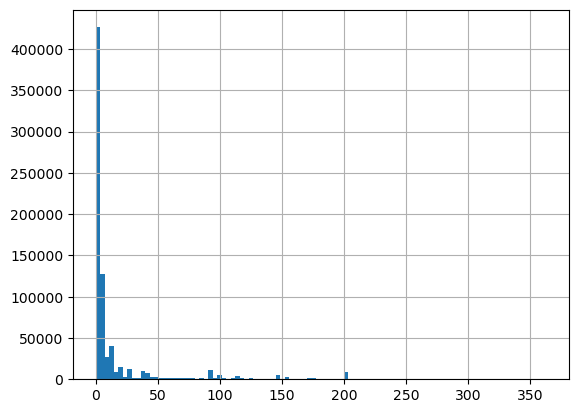

In [157]:
visits_orders['time_first_purchase'] = (visits_orders['first_purchase_date'] - visits_orders['first_visit_date']).dt.days

print(visits_orders['time_first_purchase'].hist(bins= 100))

In [155]:
print(visits_orders['time_first_purchase'].astype('int64').median)

<bound method Series.median of 0          0
1          0
2          0
3          0
4         20
          ..
761802     0
761803     0
761804     0
761805     0
761806     0
Name: time_first_purchase, Length: 761807, dtype: int64>


### Conclusión:
La distribución del tiempo que la gente demora entre iniciar la página por primera vez y realizar su primera compra no es de manera uniforme, podemos concluir entonces que la mediana es de 0d para este cálculo.

### 2.2 ¿Cuántos pedidos hacen durante un periodo de tiempo dado?

Vamos a darle un periodo de tiempo de un mes apoyado de los cohortes.

In [161]:
orders.pivot_table(
    index= 'first_purchase_month',
    columns= 'purchase_month',
    values='uid',
    aggfunc= 'count',
)

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,NaN
2017-07-01,NaN,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08-01,NaN,NaN,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN
2017-09-01,NaN,NaN,NaN,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5052.0,270.0,202.0,179.0,86.0,105.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3783.0,224.0,159.0,64.0,78.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4095.0,222.0,83.0,70.0,NaN


In [163]:
# total de cada mes
orders_per_month = orders.groupby('purchase_month')['uid'].count()
print(orders_per_month)

purchase_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
2018-06-01       1
Name: uid, dtype: int64


### Conclusiones:
Explicación de la tabla:
El primer mes de registro, primer cohorte (2017-06-01 -- "2017-06-01") se realizaron 2354 pedidos, y el segundo mes solo 177 volvieron a comprar, el tercer mes 174 pedidos y así sucesivamente.
Segundo cohorte con inicio el (2017-07-01 -- "2017-07-01") se realizaron 2186 pedidos, y el mes siguiente solo 100 usuarios volvieron a realizar pedidos, así sucesivamente.

En la ultima columna aparece como NaN porque no tenemos datos al respecto, solo 1 registro.

Si queremos el total de pedidos, podemos verlos en la segunda tabla, que viene siendo la sumatoria de las columnas de cada cohorte. concluimos de esta que en el mes de diciembre es donde más se hacen compras (Debe de ser por todos los eventos que se hacen por navidad y año nuevo).

### 2.3 ¿Cuál es el tamaño promedio de compras?

In [ ]:
# Agrupamos los datos por cohortes y por mes de compra
orders_grouped_by_cohorts = orders.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'revenue': 'sum', 'uid': 'nunique'})

print(orders_grouped_by_cohorts.head())

                                     revenue   uid
first_purchase_month purchase_month               
2017-06-01           2017-06-01      9557.49  2023
                     2017-07-01       981.82    61
                     2017-08-01       885.34    50
                     2017-09-01      1931.30    54
                     2017-10-01      2068.58    88


In [169]:
# Encontramos el tamaño promedio por usuario  por compras
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)

print(orders_grouped_by_cohorts.head())

                                     revenue   uid  revenue_per_user
first_purchase_month purchase_month                                 
2017-06-01           2017-06-01      9557.49  2023          4.724414
                     2017-07-01       981.82    61         16.095410
                     2017-08-01       885.34    50         17.706800
                     2017-09-01      1931.30    54         35.764815
                     2017-10-01      2068.58    88         23.506591


In [181]:
orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='revenue_per_user',
    aggfunc='mean',
)

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


### Conclusión:
El promedio de compras de los cohortes en la tabal de arriba, varia dependiendo de la fecha pero como puntos claves:
- El cohorte 2017-09-01 tiene el mayor promedio de compras el mes "2017-12-01" con 138.66 dólares.
- El cohorte 2018-01-01 es el que tiene el menor promedio de compras justo cuando inicia (debe de ser la famosa cuesta de enero).  

### 2.4 ¿Cuánto dinero traen?

Calculamos el LTV, colocaremos un margen del 50%.

In [187]:
margin_rate = 0.5

# Calculamos el ingreso bruto
visits_orders['gp'] = visits_orders['revenue'] * margin_rate

# Edad de cada cohorte
visits_orders['time_first_purchase'] = visits_orders['time_first_purchase'].round().astype('int')

# Calculamos el LVT
visits_orders['ltv'] = visits_orders['gp'] / visits_orders['uid']

# Lo mostramos en una tabla dinámica
result = visits_orders.pivot_table(
    index='first_purchase_month', 
    columns='time_first_purchase', 
    values='ltv', 
    aggfunc='mean').round()

result = result.fillna('')
print(result)

time_first_purchase   0    1    2    3    4    5    6    7    8    9    ...  \
first_purchase_month                                                    ...   
2017-06-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-07-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-08-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-09-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-10-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-11-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2017-12-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-02-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-03-01            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-04-01            0.0  0.0  0.0  0.0  0.0  0.0  